In [1]:
from dl_functions import *
import pickle

In [2]:
image_size = (224, 224)
beauty_dict = {'average': 0, 'beautiful': 10}
images_test, beauty_test = load_data('dataset/beauty_images/beauty.csv', 0, 1, 2, 'test', beauty_dict)
images_train, beauty_train = load_data('dataset/beauty_images/beauty.csv', 0, 1, 2, 'train', beauty_dict)
images_valid, beauty_valid = load_data('dataset/beauty_images/beauty.csv', 0, 1, 2, 'valid', beauty_dict)

In [3]:

images_test = read_images('dataset/beauty_images/', images_test, image_size)
images_train = read_images('dataset/beauty_images/', images_train, image_size)
images_valid = read_images('dataset/beauty_images/', images_valid, image_size)



In [4]:
model_path = 'models/conv10'
try:
    model = tf.keras.models.load_model(model_path)
except:
    images_test = images_test.reshape(300, 224, 224, 1)
    images_valid = images_valid.reshape(300, 224, 224, 1)
    images_train = images_train.reshape(4000, 224, 224, 1)
    model, history = conv_nn(images_train, images_valid, beauty_train, beauty_valid, 11)
    model.save('models/conv10')
print(f'Test accuracy: {round(model.evaluate(images_test, beauty_test)[1], 2) *100} %')


10/10 [==============================] - 2s 86ms/step - loss: 0.3563 - accuracy: 0.9100
Test accuracy: 91.0 %


In [5]:
try:
    with open('models/conv10historyDict', 'rb') as file_pi:
        history = pickle.load(file_pi)
except:
    with open('models/conv10historyDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
#model.save('models/conv10')
#conv = tf.keras.models.load_model('models/convNN.h5')

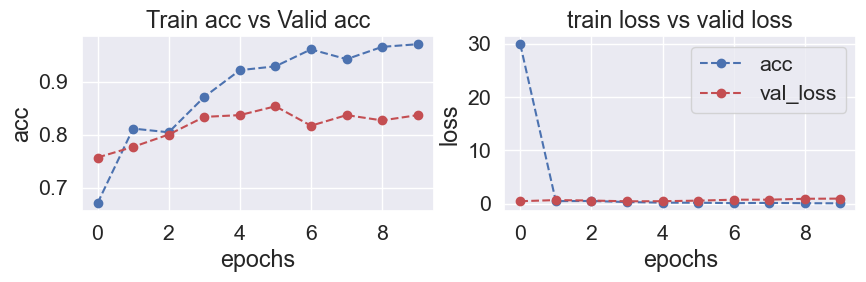

In [6]:
plot_accuracy_loss(history)